Importando as dependências

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [10]:
#carregando o dataset para o Dataframe Pandas
df = pd.read_csv("./datasets/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#número de linhas e colunas no Dataframe
df.shape

(1599, 12)

Renomeação dos dados

In [12]:
df.rename(columns={"fixed acidity": "acidez fixa"}, inplace=True)
df.rename(columns={"volatile acidity": "acidez volatil"}, inplace=True)
df.rename(columns={"citric acid": "acido citrico"}, inplace=True)
df.rename(columns={"residual sugar": "cloreto de acucar"}, inplace=True)
df.rename(columns={"chlorides": "residual dioxido"}, inplace=True)
df.rename(columns={"free sulfur dioxide": "dioxido de enxofre livre"}, inplace=True)
df.rename(columns={"total sulfur dioxide": "dioxido enxofre total"}, inplace=True)
df.rename(columns={"density": "densidade"}, inplace=True)
df.rename(columns={"pH": "PH"}, inplace=True)
df.rename(columns={"sulphates": "sulfatos"}, inplace=True)
df.rename(columns={"alcohol": "alcool"}, inplace=True)
df.rename(columns={"quality": "qualidade"}, inplace=True)


In [13]:
df.head()

,acidez fixa,acidez volatil,acido citrico,cloreto de acucar,residual dioxido,dioxido de enxofre livre,dioxido enxofre total,densidade,PH,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
#verificando valores ausentes
df.isnull().sum()

acidez fixa                 0
acidez volatil              0
acido citrico               0
cloreto de acucar           0
residual dioxido            0
dioxido de enxofre livre    0
dioxido enxofre total       0
densidade                   0
PH                          0
sulfatos                    0
alcool                      0
qualidade                   0
dtype: int64

Data Analysis and Visulaization

In [15]:
df.describe()

,acidez fixa,acidez volatil,acido citrico,cloreto de acucar,residual dioxido,dioxido de enxofre livre,dioxido enxofre total,densidade,PH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


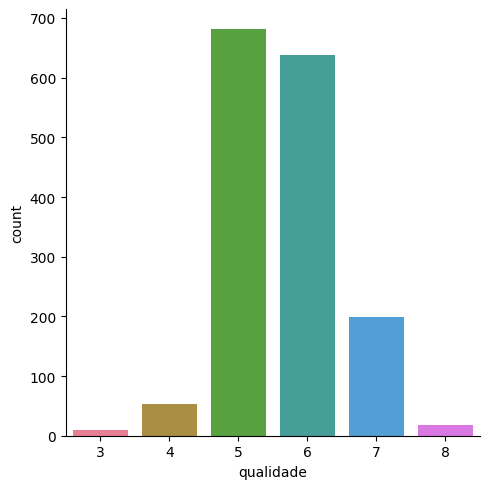

In [16]:

import seaborn as sns

# Definindo uma paleta de cores
my_palette = sns.color_palette("husl", len(df['qualidade'].unique()))

# Criando o catplot com a paleta de cores definida
# número de valores para cada qualidade
sns.catplot(x="qualidade", data=df, kind='count', hue='qualidade', palette=my_palette, legend=False)



C:\Users\Matheus\AppData\Local\Temp\ipykernel_5308\1404206591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='qualidade', y='acido citrico', data=df , palette=my_palette, legend=False)


<Axes: xlabel='qualidade', ylabel='acido citrico'>

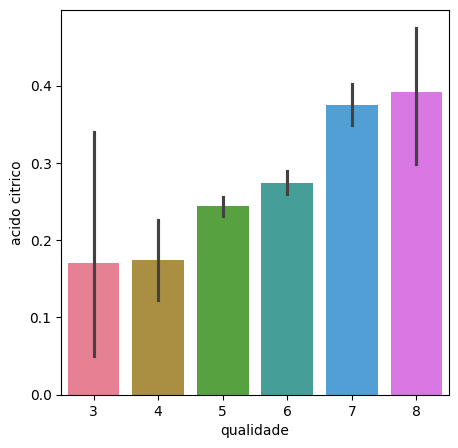

In [17]:
#acido citrico vs qualidade
plot = plt.figure(figsize=(5,5))
sns.barplot(x='qualidade', y='acido citrico', data=df , palette=my_palette, legend=False)

Correlação

1. Poisitiva Correlação 
2. Negativa Correlação

In [18]:
correlacao = df.corr()

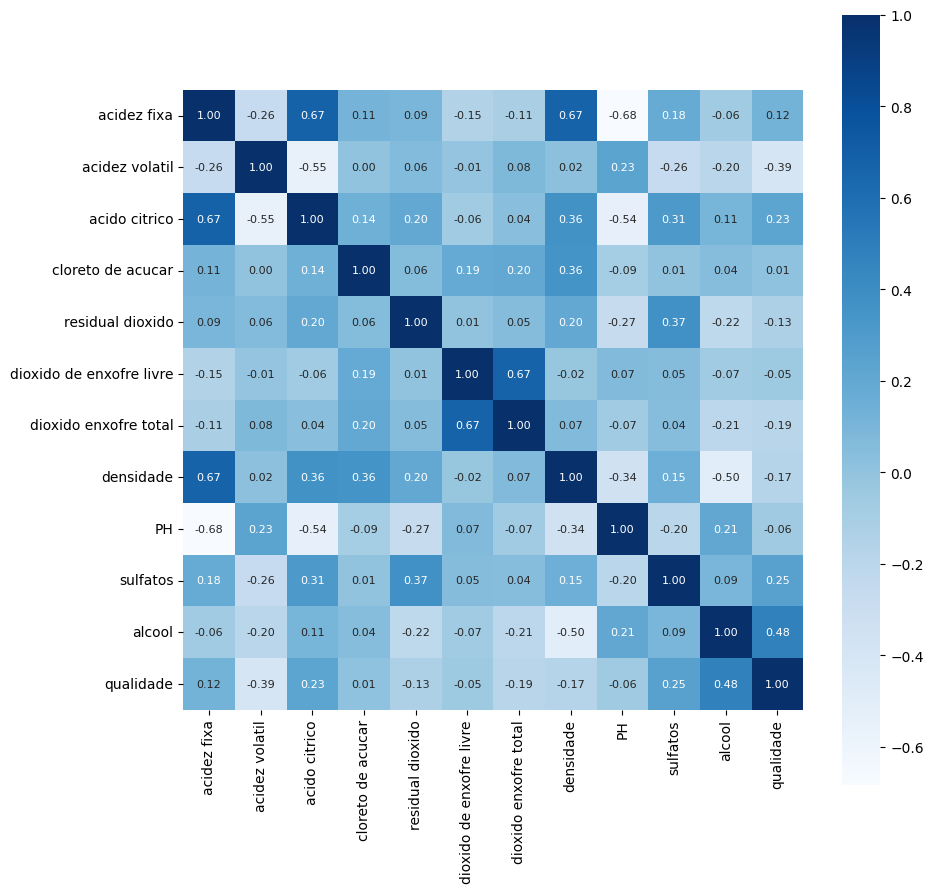

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlacao, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()


Data Preprocessing

In [20]:
#separe os dados e o rótulo
X = df.drop('qualidade',axis=1)

In [21]:
print(X)

      acidez fixa  acidez volatil  acido citrico  cloreto de acucar  \
0             7.4           0.700           0.00                1.9   
1             7.8           0.880           0.00                2.6   
2             7.8           0.760           0.04                2.3   
3            11.2           0.280           0.56                1.9   
4             7.4           0.700           0.00                1.9   
...           ...             ...            ...                ...   
1594          6.2           0.600           0.08                2.0   
1595          5.9           0.550           0.10                2.2   
1596          6.3           0.510           0.13                2.3   
1597          5.9           0.645           0.12                2.0   
1598          6.0           0.310           0.47                3.6   

      residual dioxido  dioxido de enxofre livre  dioxido enxofre total  \
0                0.076                      11.0                   34.0 

Binarização de rótulos

In [22]:
Y = df['qualidade'].apply(lambda y_value:1 if y_value >=7 else 0)

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: qualidade, Length: 1599, dtype: int64


Train & Test Split 

In [32]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Treinamento de modelo:



Classificador Florestal Aleatório

In [47]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()

In [48]:
model.fit(X_train , Y_train)

RandomForestClassifier()

Avaliação do modelo

Pontuação de precisão

In [44]:
# precisão nos dados de teste
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [45]:
print('Precisão: ',test_data_accuracy)

Precisão:  0.921875


Construindo Sistema Preditivo

In [754]:
import random

def randomise_acidez_fixa(value):
    value=16
    return random.uniform(4, value)  # Intervalo típico para a acidez fixa em vinhos

def randomise_acidez_volatil(value):
    value = 1.5
    return random.uniform(0.1, value)  # Intervalo típico para a acidez volátil em vinhos
def randomise_acido_citrico(value):
    value=0.8
    return random.uniform(0, value)  # Intervalo típico para o ácido cítrico em vinhos

def randomise_cloreto_de_acucar(value):
    value=20
    return random.uniform(0, value)  # Intervalo típico para o cloreto de açúcar em vinhos

def randomise_residual_de_dioxido(value):
    value=100
    return random.uniform(1, value)  # Intervalo típico para o residual de dióxido em vinhos

def randomise_dioxido_de_enxofre_livre(value):
    value = 40  
    return random.uniform(1, value)  # Intervalo típico para o dióxido de enxofre livre em vinhos


def randomise_dioxido_de_enxofre_total(value):
    value = 289
    return random.uniform(6, value)  # Intervalo típico para o dióxido de enxofre total em vinhos

def randomise_densidade(value):
    value = 1.00567
    return random.uniform(0.98711, value)  # Intervalo típico para a densidade em vinhos

def randomise_ph(value):
    value= 4.01
    return random.uniform(2.72, value)  # Intervalo típico para o pH em vinhos

def randomise_sulfatos(value):
    value = 2
    return random.uniform(0.33, value)  # Intervalo típico para os sulfatos em vinhos

def randomise_alcool(value):
    value = 14.9
    return random.uniform(8.0,value)  # Intervalo típico para o teor alcoólico em vinhos

# Gerando os dados de entrada com números aleatórios
input_data = (
    randomise_acidez_fixa(7.5),  # acidez fixa
    randomise_acidez_volatil(0.5),  # acidez volátil
    randomise_acido_citrico(0.36), # ácido cítrico
    randomise_cloreto_de_acucar(0.071), # cloreto de açúcar
    randomise_residual_de_dioxido(17.0), # residual de dióxido
    randomise_dioxido_de_enxofre_livre(15.0), # dióxido de enxofre livre
    randomise_dioxido_de_enxofre_total(102.0), # dióxido enxofre total
    randomise_densidade(0.9978), # densidade
    randomise_ph(3.5), # pH
    randomise_sulfatos(0.8), # sulfatos
    randomise_alcool(10.5) # álcool
)

# Formatando cada elemento da tupla com precisão de ponto flutuante
formatted_input_data = [f'{item:.2f}' for item in input_data]

print(formatted_input_data)


#alterando os dados de entrada para um array numpy 
input_data_as_numpy_array = np.asarray(input_data)
#reshape os dados, pois estamos prevendo o rótulo para apenas uma instância
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Boa Qualidade')
else:
    print('Má Qualidade')

['9.85', '1.07', '0.27', '6.11', '21.71', '7.59', '12.13', '0.99', '3.15', '1.46', '13.74']
[1]
Boa Qualidade


c:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
